## Introduction to Quasi-Newton Methods

In the last part of the last chapter, the motivation to study *quasi-Newton methods* was introduced. To avoid high computational costs, the *quasi-Newton methods* adapt to using the inverse of the Hessian matrix of the objective function to compute the minimizer, unlike the *Newton method* where the inverse of the Hessian matrix is calculated at each iteration. The basic iterative formulation for the Newton's method is given by

\begin{equation}
\mathbb{x}_j = \mathbb{x}_{j-1} - [\mathbb{H}f]^{-1}(\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}), j = 1, 2, \ldots  
\end{equation}

where, the descent direction at the $j^{th}$ step is given by
\begin{equation}
\mathbb{\delta_j} = - [\mathbb{H}f]^{-1}(\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}) 
\end{equation}

If $\beta_j$ is the selected step length along the $j^{th}$ descent direction and $\mathbb{B}f(\mathbb{x}_j)$ is the approximation to the inverse of the Hessian, $[\mathbb{H}f(\mathbb{x}_{j})]^{-1}$, then The *Quasi-Newton method* is written as the given iteration formula:
\begin{equation}
    \mathbb{x}_j = \mathbb{x}_{j-1}-\beta_j[\mathbb{B}f](\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}) {eq:1}\tag{1}
\end{equation}

where, the descent direction $\mathbb{\delta}_j$ is given by:
\begin{equation}
    \mathbb{\delta_j} = -[\mathbb{B}f](\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}) {eq:2}\tag{2}
\end{equation}

Note that,
\begin{equation}
    [\mathbb{B}f](\mathbb{x}) \equiv [\mathbb{H}f]^{-1}(\mathbb{x}) \equiv [\mathbb{H}f(\mathbb{x})]^{-1} {eq:3}\tag{3}
\end{equation}

## The Approximate Inverse Matrix

Using Taylor's theorem to approximate the gradient of the Objective function, we can write:
\begin{equation}
    \nabla f(\mathbb{x}) \simeq \nabla f(\mathbb{x}_0) + \mathbb{H}f(\mathbb{x})(\mathbb{x} - \mathbb{x}_0) {eq:4}\tag{4}
\end{equation}

So at iterates $\mathbb{x}_j$ and $\mathbb{x}_{j-1}$ Eq.~\eqref{eq:4} can be written as:
\begin{equation}
    \nabla f(\mathbb{x}_j) = \nabla \mathbb{f}(\mathbb{x}_0) + \mathbb{H}f(\mathbb{x}_j)(\mathbb{x}_j - \mathbb{x}_0) {eq:5}\tag{5}
\end{equation}

and
\begin{equation}
    \nabla f(\mathbb{x}_{j-1}) = \nabla f(\mathbb{x}_0) + \mathbb{H}f(\mathbb{x}_j)(\mathbb{x}_{j-1} - \mathbb{x}_0) {eq:6}\tag{6}
\end{equation}

So, subtracting Eq.\eqref{eq:6} from Eq.\eqref{eq:6}, we get,
\begin{align}
    &&\nabla f(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1}) &= \mathbb{H}f(\mathbb{x}_j)(\mathbb{x}_j - \mathbb{x}_{j-1})  \\
    &\implies& \mathbb{H}f(\mathbb{x}_j)\mathbb{D}_j &= \mathbb{G}_j  \\
    &\implies& \mathbb{D}_j &= [\mathbb{H}f(\mathbb{x}_j)]^{-1}\mathbb{G}_j\\
    &\implies& \mathbb{D}_j &= [\mathbb{B}f](\mathbb{x}_j)\mathbb{G}_j {eq:7}\tag{7}
\end{align}

Eq.\eqref{eq:7} is the *secant equation*. Here, $[\mathbb{B}(\mathbb{x}_j)]$ is the approximate to the inverse of the Hessian matrix of the objective function $f$ at the $j^{th}$ iterate. As the iteration of the optimization technique advances in each step, it should be kept in mind that if $\mathbb{B}f(\mathbb{x}_{j-1})$ is symmetric and positive definite, then $\mathbb{B}f(\mathbb{x}_j)$ should be symmetric and positive definite. Various mechanisms have been developed for updating the inverse matrix, generally given by the formula:
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) + \mathbb{\Delta} {eq:8}\tag{8}
\end{equation}

## Rank 1 Update Algorithm

In the *rank 1 update algorithm*, the *update matrix* $\mathbb{\Delta}$ is a rank 1 matrix. the *rank* of a matrix is given by its maximal number of linearly independent columns. To formulate a rank 1 update, we write the *update matrix* as:
\begin{equation}
    \mathbb{\Delta} = \sigma \mathbb{w} \otimes \mathbb{w} = \sigma \mathbb{w}\mathbb{w}^T {eq:9}\tag{9}
\end{equation}

where, $\otimes$ is the outer product between two matrices/vectors. So, Eq.\eqref{eq:9} becomes:
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) + \sigma \mathbb{w}\mathbb{w}^T {eq:10}\tag{10}
\end{equation}

Our task is to evaluate the explicit forms of the scalar constant $\sigma$ and the vector $\mathbb{w}$, where $\mathbb{w} \in \mathbb{R}^n$. Now, replacing $[\mathbb{B}f](\mathbb{x}_j)$ in Eq.\eqref{eq:8} with the one in Eq.\eqref{eq:10}, we have,
\begin{align}
    \mathbb{D}_j &= ([\mathbb{B}f](\mathbb{x}_{j-1}) + \sigma \mathbb{w}\mathbb{w}^T)\mathbb{G}_j  \\
    &= [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j + \sigma \mathbb{w}(\mathbb{w}^T\mathbb{G}_j) {eq:11}\tag{11}
\end{align}

This can be rearranged to write,
\begin{equation}
    \sigma \mathbb{w} = \frac{\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j}{\mathbb{w}^T\mathbb{G}_j} {eq:12}\tag{12}
\end{equation}

As $\mathbb{w}^T\mathbb{G}_j$ is a scalar, we see that it can be taken to the denominator in Eq.\eqref{eq:12}. Now, it is clearly evident that,
\begin{equation}
    \sigma = \frac{1}{\mathbb{w}^T\mathbb{G}_j} {eq:13}\tag{13}
\end{equation}
and
\begin{equation}
    \mathbb{w} = \mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j {eq:14}\tag{14}
\end{equation}

So, Eq.\eqref{eq:13} can now be written as:
\begin{equation}
    \sigma = \frac{1}{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} {eq:15}\tag{15}
\end{equation}


Eventually, the *update matrix* $\mathbb{\Delta}$ from Eq.\eqref{eq:9} turns out to be:
\begin{equation}
    \mathbb{\Delta} = \frac{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} {neq:16}\tag{16}
\end{equation}

So, the rank 1 update formula is given by:
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) + \frac{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} {eq:17}\tag{17}
\end{equation}

In the update formulation of the inverse matrix, most often $[\mathbb{B}f](x_0)$ is considered to be the $n \times n$ identity matrix. The iteration is continued until and unless the convergence criteria are satisfied. If $[\mathbb{B}f](\mathbb{x}_{j-1})$ is symmetric, then Eq.\eqref{eq:17} ensures that $[\mathbb{B}f](\mathbb{x}_j)$ is symmetric too and is then called a *symmetric rank 1 update algorithm* or the *SR1 update algorithm*. Also, it can be seen that the columns of the *update matrix* $\mathbb{\Delta}$ are multiples of each other, making it a rank 1 matrix.

The *rank 1 update algorithm* has an issue with the denominator in Eq.\eqref{eq:17}. The denominator can vanish and sometimes there would be no symmetric rank 1 update in the inverse matrix, satisfying the secant equation given by Eq.\eqref{eq:7}, even for a convex quadratic objective function. There are three cases that needs to be analyzed for a particular iterate $j$ in the optimization algorithm:

* If $\mathbb{w}^T\mathbb{G}_j \neq 0$, then there is a unique rank 1 update for the inverse matrix, given by Eq.\eqref{eq:17},
* If $\mathbb{D}_j = [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j$, then the update given by Eq.\eqref{eq:17} is skipped and we consider $[\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1})$, and
* if $\mathbb{D}_j \neq [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j$ and $\mathbb{w}^T\mathbb{G}_j = 0$, then there is no rank 1 update technique available that satisfies the secant equation given by Eq.\eqref{eq:7}.

In view of the second case mentioned above, there is a necessity to introduce a *skipping criterion* which will prevent the *rank 1 update algorithm* from crashing. The update of the inverse matrix at a particular iterate $j$, given by Eq.\eqref{eq:17} must be applied if the following condition is satisfied: 
\begin{equation}
    |\mathbb{w}^T\mathbb{G}_j| \geq \alpha_3\|\mathbb{G}_j\| \|\mathbb{w}\| {eq:18}\tag{18}
\end{equation}

otherwise no update in the inverse matrix must be made. Here $\alpha_3$ is a very small number usually taken as $\alpha_3 \sim 10^{-8}$. The last case in the above mentioned cases however gives the motivation to introduce a rank 2 update formulation for the inverse matrix, such that the singularity case defining the vanishing of the denominator can be avoided.



### An Example

Let us consider *Branin function* as the objective function, given by:
\begin{equation}
    f(x_1, x_2) = a(x_2 - bx_1^2 + cx_1 - r)^2 + s(1-t)\cos(x_1)+s {eq:19}\tag{19}
\end{equation}
where $a, b, c, r, s$ and $t$ are constants whose default values are $a = 1, b = \frac{5.1}{4\pi^2}, c = \frac{5}{\pi}, r = 6, s = 10$ and $t = \frac{1}{8\pi}$.

Considering the default constant values, *Branin function* has four minimizers given by:
* $f(-\pi, 12.275) \simeq 0.397887$,
* $f(\pi, 2.275) \simeq 0.397887$,
* $f(3\pi, 2.475) \simeq 0.397887$, and
* $f(5\pi, 12.875) \simeq 0.397887$
  
We will use *Rank 1 update algorithm* to find out one of these four minimizers. Let the starting iterate be $\mathbb{x}_j = \begin{bmatrix}11 \\ 5.75 \end{bmatrix}$, the tolerance be $\epsilon = 10^{-5}$, and the constants to be used in determining the step length using the *strong Wolfe conditions* be $\alpha_1=10^{-4}$ and $\alpha_2=0.24$. Let us define *Branin function* and its gradient in Python:
  

In [1]:
# import the required packages
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy
def func(x): # Objective function (Branin function)
    return (x[1] - (5.1/(4*au.pi**2))*x[0]**2 + (5/au.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*au.pi))*au.cos(x[0]) + 10
    
Df = grad(func) # Gradient of the objective function

We first draw the contour plot of the *Branin function* and then define the Python function `rank_1()` implementing *Rank 1 update algorithm*:

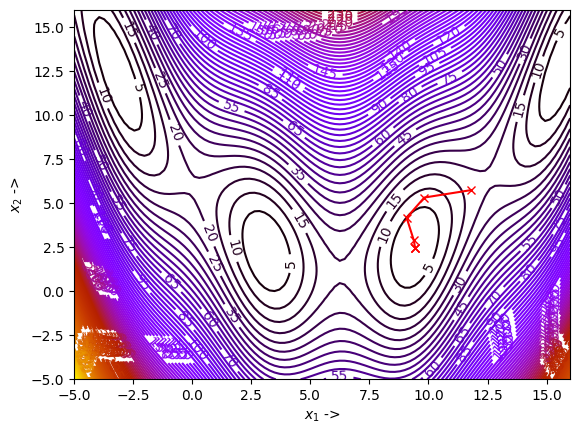

(array([9.42477808, 2.47500166]), 0.39788735773222506)

In [2]:
from scipy.optimize import line_search
NORM = np.linalg.norm
x1 = np.linspace(-5, 16, 100)
x2 = np.linspace(-5, 16, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
def rank_1(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj 
            Gj = Df(X) - Grad
            w = Dj - Bf.dot(Gj) 
            wT = w.T 
            sigma = 1/(wT.dot(Gj))
            W = np.outer(w, w)
            Delta = sigma*W 
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): # update criterion
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            
rank_1(np.array([11.8, 5.75]), 10**-5, 10**-4, 0.24)

We see that for our choice of parameters, the algorithm has converged to the minimizer $\mathbb{x}^* \sim \begin{bmatrix}3\pi \\ 2.475 \end{bmatrix}$ where the function value is $f(\mathbb{x}^*) \simeq 0.397887$.


In [3]:
import pandas as pd

def rank_1(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    F = [func(Xj)]
    DF = [NORM(Df(Xj))]
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            F += [func(X)]
            DF += [NORM(Df(X))]
            data = {'x_1': x1,
            'x_2': x2,
            'f(X)': F,
            '||grad||': DF}
            return data
        else:
            Dj = X - Xj # See line 17 of the algorithm
            Gj = Df(X) - Grad # See line 18 of the algorithm
            w = Dj - Bf.dot(Gj) # See line 19 of the algorithm
            wT = w.T # Transpose of w
            sigma = 1/(wT.dot(Gj)) # See line 20 of the algorithm
            W = np.outer(w, w) # Outer product between w and the transpose of w
            Delta = sigma*W # See line 21 of the algorithm
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): # update criterion (See line 22-24)
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            F += [func(Xj)]
            DF += [NORM(Df(Xj))]
data =rank_1(np.array([11.8, 5.75]), 10**-5, 10**-4, 0.24)
df = pd.DataFrame(data, columns = ['x_1', 'x_2', 'f(X)', '||grad||'])

df

,x_1,x_2,f(X),||grad||
0,11.800000,5.750000,17.212124,5.192532
1,9.823877,5.327653,7.379664,5.088732
2,9.075617,4.182754,4.923577,7.429495
3,9.380532,2.891880,0.613355,1.488986
4,9.430713,2.475581,0.398076,0.065085
5,9.424188,2.474275,0.397889,0.005301
6,9.424778,2.475002,0.397887,0.000003


## Rank 2 Update Algorithms

We will be discussing the following algorithms under this category:

* *Davidon-Fletcher-Powell* (DFP) algorithm,
* *Broyden-Fletcher-Goldfarb-Shanno* (BFGS) algorithm, and
* *Huang's family of rank 2 updates*.

We will only look into the first one, i.e, DFP. ### Davidon-Fletcher-Powell Algorithm

Eq.(8) gives the updating mechanism of the approximation to the inverse of the Hessian matrix of our objective function and Eq.(7) gives the *secant equation*. In rank 2 updates, the *update matrix* $\mathbb{\Delta}$ is expressed as the sum of two rank 1 updates, given by:
\begin{equation}
    \mathbb{\Delta} = \sigma_1\mathbb{w}_1 \otimes \mathbb{w}_1 + \sigma_2\mathbb{w}_2 \otimes \mathbb{w}_2 = \sigma_1\mathbb{w}_1\mathbb{w}_1^T + \sigma_2\mathbb{w}_2\mathbb{w}_2^T {eq:20}\tag{20}
\end{equation}

such that, Eq.(8) becomes:
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) +  \sigma_1\mathbb{w}_1\mathbb{w}_1^T + \sigma_2\mathbb{w}_2\mathbb{w}_2^T {eq:21}\tag{21}
\end{equation}

Here, $\sigma_1$ and $\sigma_2$ are scalars and $\mathbb{w}_1, \mathbb{w}_2 \in \mathbb{R}^n$. Now, Eq.(7) becomes:
\begin{equation}
    \mathbb{D}_j = [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j + \sigma_1\mathbb{w}_1(\mathbb{w}_1^T\mathbb{G}_j) + \sigma_2\mathbb{w}_2(\mathbb{w}_2^T\mathbb{G}_j) {eq:22}\tag{22}
\end{equation}

We notice that $\mathbb{w}_1^T\mathbb{G}_j$ and $\mathbb{w}_2^T\mathbb{G}_j$ are scalars. One of the non-unique combinations of choices that satisfy Eq.\eqref{eq:22} is:
\begin{align}
    \mathbb{w}_1 &= \mathbb{D}_j {eq:23}\tag{23}\\
    \mathbb{w}_2 &= [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j {eq:24}\tag{24}\\
    \sigma_1 &= \frac{1}{\mathbb{w}_1^T\mathbb{G}_j} {eq:25}\tag{25}\\
    \sigma_2 &= -\frac{1}{\mathbb{w}_2^T\mathbb{G}_j} {eq:26}\tag{26}
\end{align}

Eq.\eqref{eq:25} and Eq.\eqref{eq:26} can be rewritten as:
\begin{align}
    \sigma_1 &= \frac{1}{\mathbb{D}_j^T\mathbb{G}_j} {eq:27}\tag{27}\\
    \sigma_2 &= - \frac{1}{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} {eq:28}\tag{28}
\end{align}

So Eq.\eqref{eq:20} becomes:

\begin{equation}
    \mathbb{\Delta} = \frac{\mathbb{D}_j\mathbb{D}_j^T}{\mathbb{D}_j^T\mathbb{G}_j} - \frac{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} {eq:29}\tag{29}
\end{equation}

Finally, the *DFP* update mechanism is given by:
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) + \frac{\mathbb{D}_j\mathbb{D}_j^T}{\mathbb{D}_j^T\mathbb{G}_j} - \frac{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} {eq:30}\tag{30}
\end{equation}

In the update formulation, we will again consider $[\mathbb{B}f](\mathbb{x}_0)$ to be the $n \times n$ identity matrix and the iteration is continued until and unless the convergence criterion is satisfied. The last two terms in Eq.\eqref{eq:30} are rank 1 updates, overall fetching a rank 2 update strategy. Note that the updated inverse matrix $[\mathbb{B}f](\mathbb{x}_j)$ is positive definite only if the optimal step length $\beta_j$ is computed accurately.

### An Example

Let us consider *Booth's function* as the objective function, given by:
\begin{equation}
    f(x_1, x_2) = (x_1+2x_2-7)^2+(2x_1+x_2-5)^2 {eq:31}\tag{31}
\end{equation}

The minimizer is at $\mathbb{x}^* = \begin{bmatrix}1\\3\end{bmatrix}$ and the function value at the minimizer is $0$. We will use *DFP* algorithm to find out the minimizer. Let the starting iterate be $\mathbb{x}_j = \begin{bmatrix}-7.8 \\ -3.75 \end{bmatrix}$, the tolerance be $\epsilon = 10^{-5}$, and the constants to be used in determining the step length using the *strong Wolfe conditions* be $\alpha_1 = 10^{-4}$ and $\alpha_2 = 3.82$. Let us first define *Booth's function* and its gradient in Python:

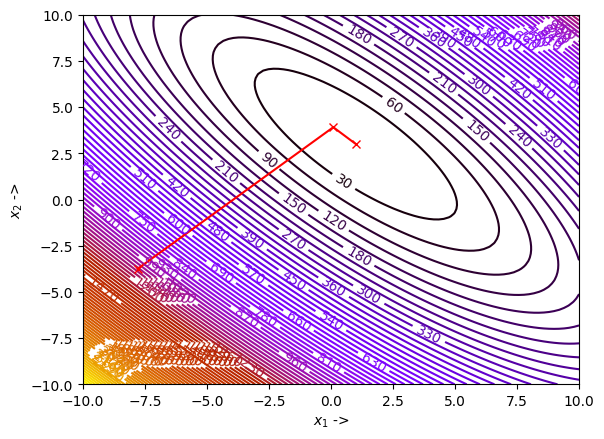

(array([1., 3.]), 1.5777218104420236e-30)

In [4]:
def func(x): # Objective function (Booth's function)
    return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2
    
Df = grad(func) # Gradient of the objective function

# draw the contour plot first
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")

# define DFP()
def DFP(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            plt.show()
            return X, func(X)
        else:
            Dj = X - Xj # See line 16 of the algorithm
            Gj = Df(X) - Grad # See line 17 of the algorithm
            w1 = Dj # See line 18 of the algorithm
            w2 = Bf.dot(Gj) # See line 19 of the algorithm
            w1T = w1.T
            w2T = w2.T
            sigma1 = 1/(w1T.dot(Gj)) # See line 20 of the algorithm
            sigma2 = -1/(w2T.dot(Gj)) # See line 21 of the algorithm
            W1 = np.outer(w1, w1)
            W2 = np.outer(w2, w2)
            Delta = sigma1*W1 + sigma2*W2 # See line 22 of the algorithm
            Bf += Delta # See line 23 of the algorithm
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

DFP(np.array([-7.8, -3.75]), 10**-5, 10**-4, 3.82)

The optimization data has been collected and shown in the table below:

In [5]:
def DFP(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    F = [func(Xj)]
    DF = [NORM(Df(Xj))]
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            F += [func(X)]
            DF += [NORM(Df(X))]
            data = {'x_1': x1,
            'x_2': x2,
            'f(X)': F,
            '||grad||': DF}
            return data
        else:
            Dj = X - Xj # See line 16 of the algorithm
            Gj = Df(X) - Grad # See line 17 of the algorithm
            w1 = Dj # See line 18 of the algorithm
            w2 = Bf.dot(Gj) # See line 19 of the algorithm
            w1T = w1.T
            w2T = w2.T
            sigma1 = 1/(w1T.dot(Gj)) # See line 20 of the algorithm
            sigma2 = -1/(w2T.dot(Gj)) # See line 21 of the algorithm
            W1 = np.outer(w1, w1)
            W2 = np.outer(w2, w2)
            Delta = sigma1*W1 + sigma2*W2 # See line 22 of the algorithm
            Bf += Delta # See line 23 of the algorithm
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]
            F += [func(Xj)]
            DF += [NORM(Df(Xj))]
data=DFP(np.array([-7.8, -3.75]), 10**-5, 10**-4, 3.82)

df = pd.DataFrame(data, columns = ['x_1', 'x_2', 'f(X)', '||grad||'])
df

,x_1,x_2,f(X),||grad||
0,-7.800000,-3.750000,1.090213e+03,1.979404e+02
1,0.090393,3.912572,1.660207e+00,2.577226e+00
2,1.000000,3.000000,1.577722e-30,7.536444e-15
